# Introduction

The purpose of this project is to find fraudulent transactions in the credit card dataset, based on 30 features provided. The features contain random numeric values ranging between -1 to 1, so it is important to determine which features are important and how to correctly classify them.

Tasks performed in this notebook:
* Reading Data
* Feature Importance Calculation
    * Plot of FScores vs Features
        * Extreme Gradient Boosting (XGB) Classifier
        * Extra Trees Classifier
    * Selecting Top Features
* Training and Classification
    * SVM
    * Random Forest Classifier
* Imbalanced Classes
* Conclusion
* Future Work

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn import svm
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, recall_score, classification_report

%matplotlib inline

C:\Users\d847710\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Reading Data

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
target = data['Class']
features = data.drop(["Class"],axis=1)

In [4]:
# Checking for Null Values
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Feature Importance Calculation

## Plot of F Scores (Feature Importance Scores) vs Features

### Extreme Gradient Boosting Classifier

In [5]:
modelxgb = XGBClassifier()
modelxgb.fit(features, target)

print(modelxgb.feature_importances_)

[ 0.01017442  0.0130814   0.00872093  0.0130814   0.1380814   0.00872093
  0.0130814   0.07412791  0.03488372  0.01017442  0.0625      0.00726744
  0.05377907  0.01598837  0.1497093   0.01162791  0.03052326  0.09011628
  0.00290698  0.03343023  0.03924419  0.0377907   0.01598837  0.02325581
  0.00145349  0.          0.02761628  0.01453488  0.02180232  0.03633721]


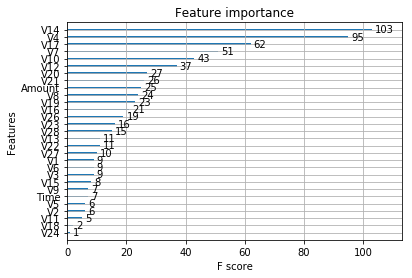

In [6]:
from xgboost import plot_importance
plot_importance(modelxgb)

Plotting features based on their importance in XGB Classifier

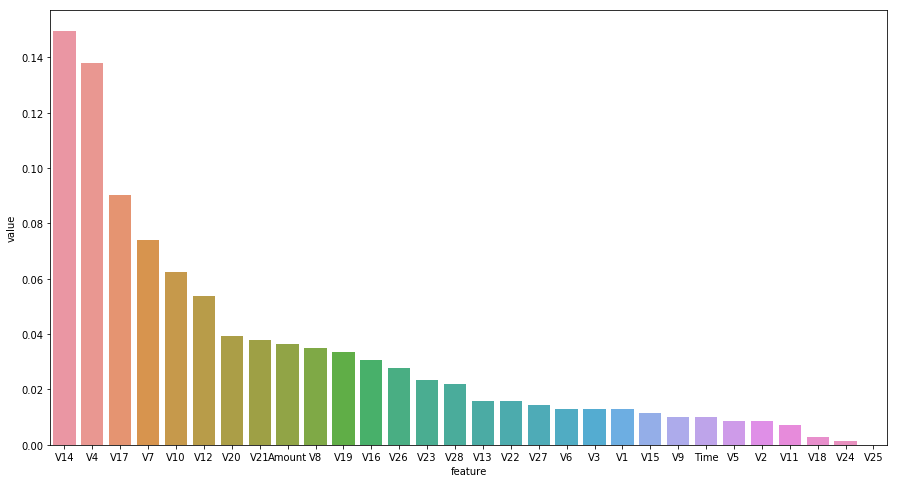

In [7]:
f_xgb = pd.DataFrame(data={'feature':features.columns,'value':modelxgb.feature_importances_})
f_xgb = f_xgb.sort_values(['value'],ascending=False )
plt.figure(figsize=(15,8))
sns.barplot(f_xgb['feature'],f_xgb['value'])

### Extra Trees Classifier

In [8]:
etcmodel = ExtraTreesClassifier()
etcmodel.fit(features,target)
print(etcmodel.feature_importances_)

[ 0.01806584  0.01233594  0.0215873   0.02601349  0.03775107  0.01142386
  0.01692775  0.01844332  0.015774    0.04139472  0.06245914  0.10503026
  0.06780241  0.00848279  0.08601701  0.01092754  0.06624196  0.16642131
  0.05492475  0.01777855  0.01099142  0.01436446  0.0140781   0.00888376
  0.01129813  0.00996751  0.01697279  0.01720999  0.01803187  0.01239897]


Plotting features based on their importance in ETC Classifier

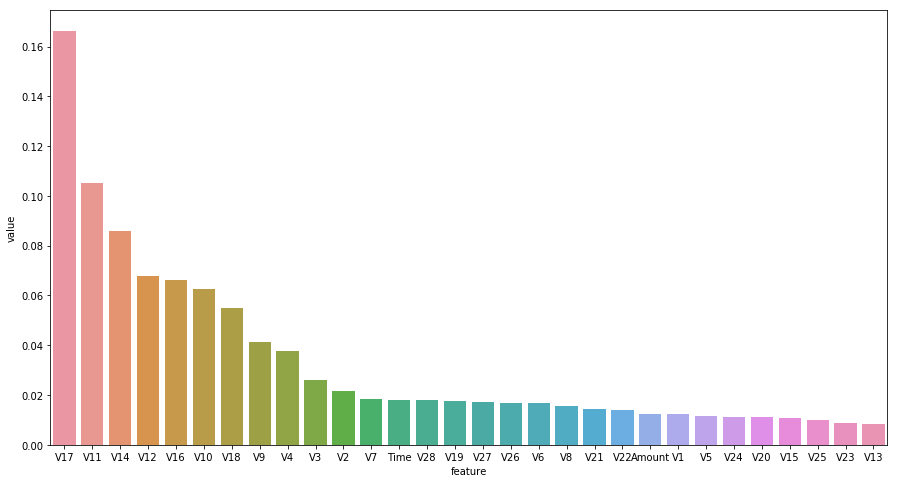

In [9]:
f_etc = pd.DataFrame(data={'feature':features.columns,'value':etcmodel.feature_importances_})
f_etc = f_etc.sort_values(['value'],ascending=False )
plt.figure(figsize=(15,8))
sns.barplot(f_etc['feature'],f_etc['value'])

## Selecting Top Features

Selecting the top 15 features based on the aggregate of top features in both the classifiers

In [10]:
ft = pd.merge(f_xgb, f_etc, how='inner', on=["feature"])

In [11]:
ft.sort_values(["value_x","value_y"],ascending=False, inplace=True)

In [12]:
top15ft = ft.head(15)
top15ft

,feature,value_x,value_y
0,V14,0.149709,0.086017
1,V4,0.138081,0.037751
2,V17,0.090116,0.166421
3,V7,0.074128,0.018443
4,V10,0.062500,0.062459
5,V12,0.053779,0.067802
6,V20,0.039244,0.010991
7,V21,0.037791,0.014364
8,Amount,0.036337,0.012399
9,V8,0.034884,0.015774


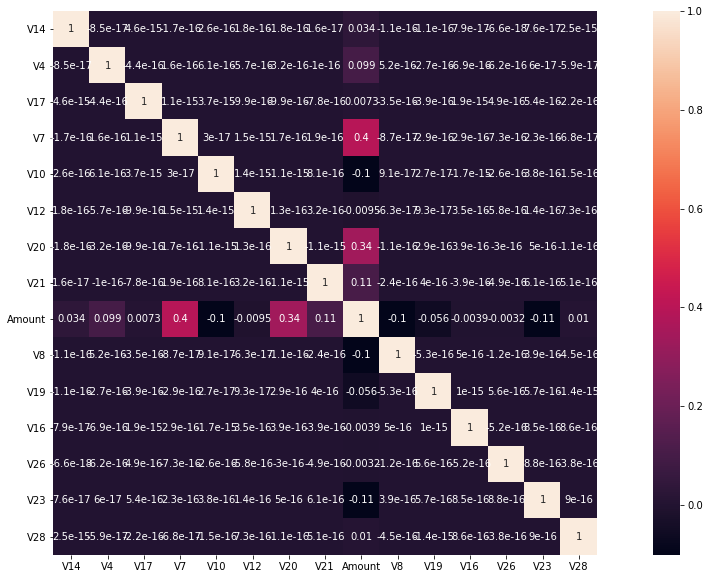

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(features[top15ft.feature].corr(), square=True, annot=True,robust=True, yticklabels=1)

# Training and Classification

In [14]:
X=features[top15ft.feature]
Y=target.values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

## Support Vector Machines

In [15]:
modelsvm = svm.SVC(kernel='rbf', gamma='auto')
modelsvm.fit(X_train, y_train)
y_svm = modelsvm.predict(X_test)
accuracy_score(y_test, y_svm)

0.99880622169165412

In [22]:
svm_conf_matrix = confusion_matrix(y_test, y_svm)

In [27]:
svm_conf_matrix

array([[85283,     5],
       [   97,    58]], dtype=int64)

## Random Forest Classifier

In [18]:
modelrf = RandomForestClassifier(max_depth = 2, random_state = 0)
modelrf.fit(X_train, y_train)
y_rf = modelrf.predict(X_test)
accuracy_score(y_test, y_rf)

0.99909881441428794

#### References
* https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now
* https://www.kaggle.com/marconox/card-fraud-detection

# Imbalanced Classes

Text(0,0.5,'Frequency')

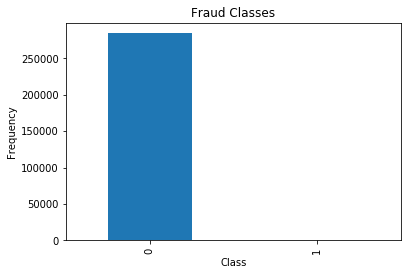

In [19]:
class_count = pd.value_counts(data['Class'], sort = True).sort_index()
class_count.plot(kind = 'bar')
plt.title("Fraud Classes")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [20]:
class_count

0    284315
1       492
Name: Class, dtype: int64

In [28]:
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


# Conclusion

The accuracy scores by both SVM and Random Forests shown here are high and may seem like positive results, but they are misleading. As seen in the SVM confusion matrix, SVM correctly classifies the normal transactions but incorrectly classifies most of the fraud transactions. Since the focus of this project is to determine fraud transactions, the results aren't that good. So, that would mean focusing on either balancing the extremely imbalanced dataset,or using anomaly or outlier detection methods to find the fraud transactions. Will cover that in future when I find the time. 

# Future Work

* LGBM Classifier for feature importance calculation
* Exploring Anomaly and Outlier Detection for fraud transactions
* Exploring Imbalanced Datasets and how to normalise them so the data isnt as skewed